In [1]:
import numpy as np
import pandas as pd

In [2]:
matches = pd.read_csv('D:\\temp\\My_Work\\IPL_Win_Prediction\\data\\matches.csv')
delivery = pd.read_csv('D:\\temp\\My_Work\\IPL_Win_Prediction\\data\\Ball_by_Ball.csv')

In [3]:
delivery.head(10)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
5,335982,1,7,4,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
6,335982,1,7,5,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
7,335982,1,7,6,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
8,335982,1,8,1,BB McCullum,RT Ponting,JH Kallis,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
9,335982,1,8,2,BB McCullum,RT Ponting,JH Kallis,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [4]:
total_score_df = delivery.groupby(['id','inning']).sum()['total_runs'].reset_index()

In [5]:
total_score_df

,id,inning,total_runs
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
1625,1237178,2,132
1626,1237180,1,189
1627,1237180,2,172
1628,1237181,1,156


In [6]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [7]:
total_score_df

,id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
1620,1216547,1,201
1622,1237177,1,200
1624,1237178,1,131
1626,1237180,1,189


In [8]:
match_df = matches.merge(total_score_df[['id','total_runs']],left_on='id',right_on='id')

In [9]:
match_df

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,total_runs
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,222
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,240
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,129
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,165
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel,201
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon,200
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi,131
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi,189


In [10]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [11]:
teams = [
    'Sunrisers Hyderabad',
    'Royal Challengers Bangalore',
    'Kings XI Punjab',
    'Mumbai Indians',
    'Kolkata Knight Riders',
    'Rajasthan Royals',
    'Chennai Super Kings',
    'Delhi Capitals'
]

In [12]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [13]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [14]:
match_df.shape

(701, 18)

In [15]:
match_df

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,total_runs
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,222
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,240
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,129
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,165
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel,201
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon,200
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi,131
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi,189


In [16]:
match_df = match_df[['id','city','winner','total_runs']]

In [17]:
delivery_df = match_df.merge(delivery,on='id')

In [18]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [19]:
delivery_df.shape

(80341, 21)

In [20]:
delivery_df['current_score'] = delivery_df.groupby('id').cumsum()['total_runs_y']

In [21]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [22]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [23]:
delivery_df

,id,city,winner,total_runs_x,inning,over,ball,batsman,non_striker,bowler,...,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,current_score,runs_left,balls_left
121,335982,Bangalore,Kolkata Knight Riders,222,2,6,2,CL White,MV Boucher,AB Agarkar,...,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,0,222,88
122,335982,Bangalore,Kolkata Knight Riders,222,2,6,3,CL White,MV Boucher,AB Agarkar,...,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1,221,87
123,335982,Bangalore,Kolkata Knight Riders,222,2,6,4,MV Boucher,CL White,AB Agarkar,...,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,2,220,86
124,335982,Bangalore,Kolkata Knight Riders,222,2,6,5,MV Boucher,CL White,AB Agarkar,...,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,3,219,85
125,335982,Bangalore,Kolkata Knight Riders,222,2,6,6,MV Boucher,CL White,AB Agarkar,...,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,3,219,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166366,1237181,Dubai,Mumbai Indians,156,2,17,6,HH Pandya,Ishan Kishan,K Rabada,...,0,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Capitals,154,2,18
166367,1237181,Dubai,Mumbai Indians,156,2,18,1,HH Pandya,Ishan Kishan,A Nortje,...,0,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Capitals,155,1,17
166368,1237181,Dubai,Mumbai Indians,156,2,18,2,Ishan Kishan,HH Pandya,A Nortje,...,0,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Capitals,156,0,16
166369,1237181,Dubai,Mumbai Indians,156,2,18,3,HH Pandya,Ishan Kishan,A Nortje,...,1,caught,HH Pandya,AM Rahane,NaN,Mumbai Indians,Delhi Capitals,156,0,15


In [24]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna(0)
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == 0 else 1)

In [25]:
wickets = delivery_df.groupby('id').cumsum()['player_dismissed'].values
delivery_df['wickets'] = 10 - wickets

In [26]:
delivery_df

,id,city,winner,total_runs_x,inning,over,ball,batsman,non_striker,bowler,...,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,current_score,runs_left,balls_left,wickets
121,335982,Bangalore,Kolkata Knight Riders,222,2,6,2,CL White,MV Boucher,AB Agarkar,...,NaN,0,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,0,222,88,10
122,335982,Bangalore,Kolkata Knight Riders,222,2,6,3,CL White,MV Boucher,AB Agarkar,...,NaN,0,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1,221,87,10
123,335982,Bangalore,Kolkata Knight Riders,222,2,6,4,MV Boucher,CL White,AB Agarkar,...,NaN,0,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,2,220,86,10
124,335982,Bangalore,Kolkata Knight Riders,222,2,6,5,MV Boucher,CL White,AB Agarkar,...,NaN,0,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,3,219,85,10
125,335982,Bangalore,Kolkata Knight Riders,222,2,6,6,MV Boucher,CL White,AB Agarkar,...,NaN,0,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,3,219,84,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166366,1237181,Dubai,Mumbai Indians,156,2,17,6,HH Pandya,Ishan Kishan,K Rabada,...,NaN,0,NaN,NaN,Mumbai Indians,Delhi Capitals,154,2,18,6
166367,1237181,Dubai,Mumbai Indians,156,2,18,1,HH Pandya,Ishan Kishan,A Nortje,...,NaN,0,NaN,NaN,Mumbai Indians,Delhi Capitals,155,1,17,6
166368,1237181,Dubai,Mumbai Indians,156,2,18,2,Ishan Kishan,HH Pandya,A Nortje,...,NaN,0,NaN,NaN,Mumbai Indians,Delhi Capitals,156,0,16,6
166369,1237181,Dubai,Mumbai Indians,156,2,18,3,HH Pandya,Ishan Kishan,A Nortje,...,caught,1,AM Rahane,NaN,Mumbai Indians,Delhi Capitals,156,0,15,5


In [27]:
delivery_df['crr'] = (delivery_df['current_score']*6)/(120-delivery_df['balls_left'])

In [28]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [29]:
delivery_df

,id,city,winner,total_runs_x,inning,over,ball,batsman,non_striker,bowler,...,fielder,extras_type,batting_team,bowling_team,current_score,runs_left,balls_left,wickets,crr,rrr
121,335982,Bangalore,Kolkata Knight Riders,222,2,6,2,CL White,MV Boucher,AB Agarkar,...,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,0,222,88,10,0.000000,15.136364
122,335982,Bangalore,Kolkata Knight Riders,222,2,6,3,CL White,MV Boucher,AB Agarkar,...,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1,221,87,10,0.181818,15.241379
123,335982,Bangalore,Kolkata Knight Riders,222,2,6,4,MV Boucher,CL White,AB Agarkar,...,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,2,220,86,10,0.352941,15.348837
124,335982,Bangalore,Kolkata Knight Riders,222,2,6,5,MV Boucher,CL White,AB Agarkar,...,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,3,219,85,10,0.514286,15.458824
125,335982,Bangalore,Kolkata Knight Riders,222,2,6,6,MV Boucher,CL White,AB Agarkar,...,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,3,219,84,10,0.500000,15.642857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166366,1237181,Dubai,Mumbai Indians,156,2,17,6,HH Pandya,Ishan Kishan,K Rabada,...,NaN,NaN,Mumbai Indians,Delhi Capitals,154,2,18,6,9.058824,0.666667
166367,1237181,Dubai,Mumbai Indians,156,2,18,1,HH Pandya,Ishan Kishan,A Nortje,...,NaN,NaN,Mumbai Indians,Delhi Capitals,155,1,17,6,9.029126,0.352941
166368,1237181,Dubai,Mumbai Indians,156,2,18,2,Ishan Kishan,HH Pandya,A Nortje,...,NaN,NaN,Mumbai Indians,Delhi Capitals,156,0,16,6,9.000000,0.000000
166369,1237181,Dubai,Mumbai Indians,156,2,18,3,HH Pandya,Ishan Kishan,A Nortje,...,AM Rahane,NaN,Mumbai Indians,Delhi Capitals,156,0,15,5,8.914286,0.000000


In [30]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [31]:
delivery_df['result'] = delivery_df.apply(result,axis = 1)

In [32]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [33]:
final_df.sample(final_df.shape[0])

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
41015,Deccan Chargers,Chennai Super Kings,Mumbai,96,75,3,142,6.133333,7.680000,0
26978,Royal Challengers Bangalore,Deccan Chargers,Johannesburg,130,67,10,143,1.471698,11.641791,0
27152,Deccan Chargers,Kolkata Knight Riders,Mumbai,89,22,6,161,4.408163,24.272727,0
107543,Mumbai Indians,Sunrisers Hyderabad,Hyderabad,79,56,10,113,3.187500,8.464286,1
93865,Mumbai Indians,Rajasthan Royals,Mumbai,113,82,7,189,12.000000,8.268293,1
...,...,...,...,...,...,...,...,...,...,...
62384,Kolkata Knight Riders,Mumbai Indians,Kolkata,141,83,8,182,6.648649,10.192771,0
33305,Kolkata Knight Riders,Delhi Daredevils,Delhi,134,52,9,177,3.794118,15.461538,0
74328,Delhi Daredevils,Kolkata Knight Riders,Raipur,16,115,9,136,144.000000,0.834783,1
31157,Mumbai Indians,Kolkata Knight Riders,Mumbai,19,82,7,155,21.473684,1.390244,1


In [34]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
69450,Rajasthan Royals,Kings XI Punjab,Jaipur,89,51,8,124,3.043478,10.470588,1


In [35]:
final_df.shape

(80341, 10)

In [36]:
new_df1 = final_df.loc[final_df['crr'] < 30]

In [37]:
new_df1.shape

(70831, 10)

In [38]:
new_df1.isnull().sum()

batting_team       0
bowling_team       0
city            1341
runs_left          0
balls_left         0
wickets            0
total_runs_x       0
crr                0
rrr                0
result             0
dtype: int64

In [39]:
new_df1.dropna(inplace = True)

C:\Users\bidwai_t\AppData\Local\Temp\ipykernel_29412\1264036459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1.dropna(inplace = True)


In [40]:
new_df1.isnull().sum()

batting_team    0
bowling_team    0
city            0
runs_left       0
balls_left      0
wickets         0
total_runs_x    0
crr             0
rrr             0
result          0
dtype: int64

In [41]:
new_df1.shape

(69490, 10)

In [42]:
new_df1 = new_df1[new_df1['balls_left'] != 0]

In [43]:
new_df1.shape

(69490, 10)

In [44]:
new_df1

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
121,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,222,88,10,222,0.000000,15.136364,0
122,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221,87,10,222,0.181818,15.241379,0
123,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,220,86,10,222,0.352941,15.348837,0
124,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,219,85,10,222,0.514286,15.458824,0
125,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,219,84,10,222,0.500000,15.642857,0
...,...,...,...,...,...,...,...,...,...,...
166366,Mumbai Indians,Delhi Capitals,Dubai,2,18,6,156,9.058824,0.666667,1
166367,Mumbai Indians,Delhi Capitals,Dubai,1,17,6,156,9.029126,0.352941,1
166368,Mumbai Indians,Delhi Capitals,Dubai,0,16,6,156,9.000000,0.000000,1
166369,Mumbai Indians,Delhi Capitals,Dubai,0,15,5,156,8.914286,0.000000,1


In [45]:
X = new_df1.iloc[:,:-1]
y = new_df1.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [46]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
93845,Mumbai Indians,Rajasthan Royals,Mumbai,136,101,9,189,16.736842,8.079208
17257,Royal Challengers Bangalore,Kolkata Knight Riders,Durban,124,69,10,139,1.764706,10.782609
64812,Delhi Daredevils,Kings XI Punjab,Dharamsala,41,58,9,141,9.677419,4.241379
68948,Chennai Super Kings,Royal Challengers Bangalore,Chennai,122,63,9,165,4.526316,11.619048
9623,Royal Challengers Bangalore,Rajasthan Royals,Jaipur,139,22,4,197,3.551020,37.909091
...,...,...,...,...,...,...,...,...,...
120363,Kings XI Punjab,Delhi Daredevils,Chandigarh,4,80,10,67,9.450000,0.300000
49831,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,-16,81,4,89,16.153846,-1.185185
51890,Mumbai Indians,Kolkata Knight Riders,Mumbai,93,60,7,147,5.400000,9.300000
122548,Kolkata Knight Riders,Mumbai Indians,Kolkata,173,125,10,173,-0.000000,8.304000


In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [49]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [50]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [51]:
y_pred = pipe.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8123471003022018

In [53]:
pipe.predict_proba(X_test)[8]

array([0.39070345, 0.60929655])

In [54]:
delivery_df.describe()

,id,total_runs_x,inning,over,ball,batsman_runs,extra_runs,total_runs_y,non_boundary,is_wicket,player_dismissed,current_score,runs_left,balls_left,wickets,crr,rrr,result
count,8.034100e+04,80341.000000,80341.0,80341.000000,80341.000000,80341.000000,80341.000000,80341.000000,80341.000000,80341.000000,80341.000000,80341.000000,80341.000000,80341.000000,80341.000000,8.032500e+04,80341.000000,80341.000000
mean,7.530963e+05,164.737519,2.0,8.918273,3.608954,1.229721,0.066691,1.296412,0.000062,0.049053,0.049053,75.237998,89.499521,68.881406,7.159209,inf,11.211541,0.522012
std,3.142141e+05,28.801474,0.0,5.565852,1.806922,1.608913,0.341923,1.597247,0.007889,0.215981,0.215981,47.387994,50.668831,33.416746,2.439450,NaN,13.820864,0.499518
min,3.359820e+05,62.000000,2.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16.000000,3.000000,0.000000,-1.068000e+03,-4.000000,0.000000
25%,5.011980e+05,147.000000,2.0,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,49.000000,41.000000,6.000000,4.211538e+00,4.307692,0.000000
50%,7.292990e+05,165.000000,2.0,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,72.000000,89.000000,70.000000,8.000000,8.048780e+00,8.079208,1.000000
75%,1.136568e+06,184.000000,2.0,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,112.000000,128.000000,98.000000,9.000000,1.470588e+01,13.050000,1.000000
max,1.237181e+06,246.000000,2.0,19.000000,9.000000,6.000000,7.000000,7.000000,1.000000,1.000000,1.000000,226.000000,246.000000,125.000000,10.000000,inf,396.000000,1.000000


In [55]:
def match_progress(x_df,match_id,pipe):
    match = x_df[x_df['id'] == match_id]
    #print(match)
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']]
    #print(temp_df)
    temp_df = temp_df[temp_df['balls_left'] != 0]
    temp_df = temp_df[temp_df['crr'] < 30]
    #print(temp_df)
    result = pipe.predict_proba(temp_df)
    #print(result)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [56]:
temp_df,target = match_progress(delivery_df,336007,pipe)
temp_df

Target- 144


,end_of_over,runs_after_over,wickets_in_over,lose,win
5957,1,1,0,67.5,32.5
5963,2,7,0,62.5,37.5
5969,3,11,0,53.7,46.3
5975,4,3,0,51.8,48.2
5981,5,10,0,43.8,56.2
5987,6,2,1,64.2,35.8
5994,7,21,0,47.3,52.7
6028,8,24,0,22.7,77.3
6116,9,1,0,22.3,77.7
6122,10,20,0,12.8,87.2


Text(0.5, 1.0, 'Target- 144')

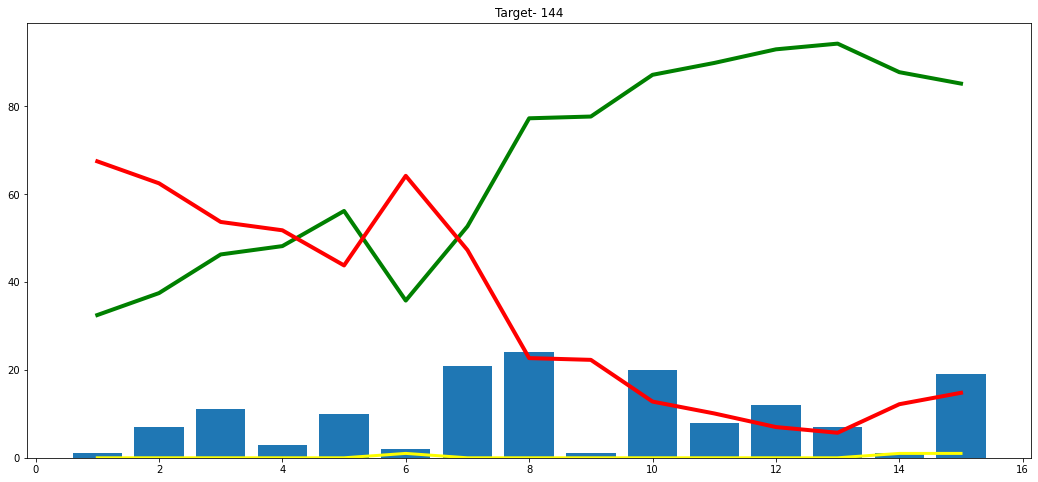

In [57]:
from turtle import color
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='green',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target- ' + str(target))

In [58]:
teams

['Sunrisers Hyderabad',
 'Royal Challengers Bangalore',
 'Kings XI Punjab',
 'Mumbai Indians',
 'Kolkata Knight Riders',
 'Rajasthan Royals',
 'Chennai Super Kings',
 'Delhi Capitals']

In [59]:
delivery_df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi', nan,
       'Bengaluru', 'Indore', 'Dubai', 'Sharjah'], dtype=object)

In [60]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))